<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 誤差をできるだけ小さくしよう

In [1]:
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## 例題5.1

最小二乗法の解析的手法をPythonでコーディングせよ．

使用する関数

[numpy.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) 逆行列を求める

データの準備と表示

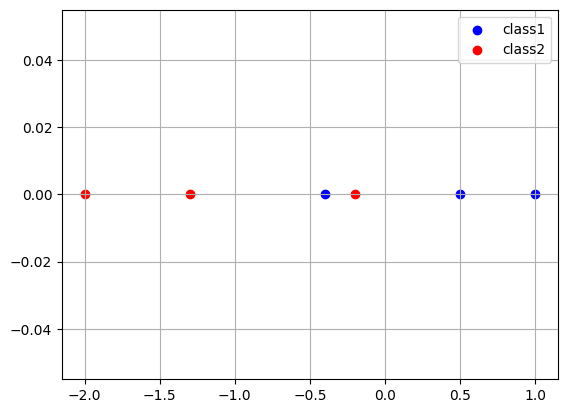

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, 0, 1, 0, 0])
plt.grid()
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='blue', label='class1')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='red',  label='class2')
plt.legend(loc='upper right')

学習の設定

In [9]:
(n, d) = X.shape
X2 = np.concatenate((np.ones((n, 1)), X), axis=1)
print(X2)

[[ 1.   1. ]
 [ 1.   0.5]
 [ 1.  -0.2]
 [ 1.  -0.4]
 [ 1.  -1.3]
 [ 1.  -2. ]]


解析的手法による解法のコードを記述せよ。

[numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) 最小二乗法を実行する関数を用いた別解を記述せよ。

## 例題5.3

Widrow-Hoffの学習規則を Python でコーディングせよ．

使用する関数

[numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) 要素の和

[numpy.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) 絶対値

データの準備と表示

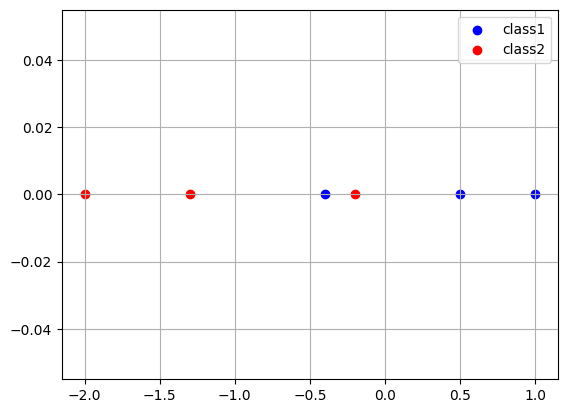

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, 0, 1, 0, 0])
plt.grid()
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='blue', label='class1')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='red',  label='class2')
plt.legend(loc='upper right')

学習の設定

In [13]:
eps = 1e-8
differ = np.inf
olderr = np.inf
w = np.array([0.2, 0.3])
rho = 0.2
(n, d) = X.shape
X2 = np.concatenate((np.ones((n, 1)), X), axis=1)
print(X2)

[[ 1.   1. ]
 [ 1.   0.5]
 [ 1.  -0.2]
 [ 1.  -0.4]
 [ 1.  -1.3]
 [ 1.  -2. ]]


Widrow-Hoffの学習規則を記述せよ。

### 機械学習ライブラリ scikit-learn を利用した最急降下法のコード

乱数で生成した線形分離不可能な2クラスのデータに対して、再急降下法 [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)を用いて二乗誤差最小の識別面を求め、mlxtendによって識別面を表示せよ。

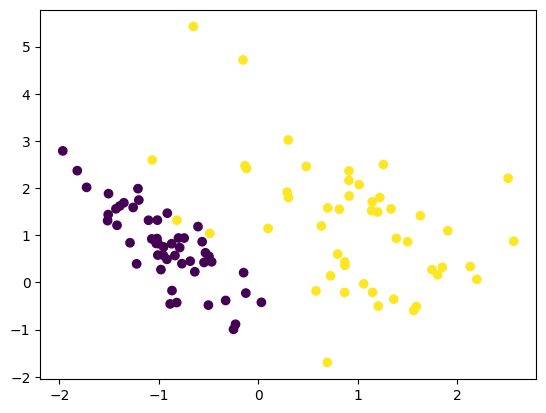

In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

SGDClassifierの学習と識別面の表示を行うコードを記述せよ。

# 解答例

### 例題5.1

In [ ]:
w = np.linalg.inv(X2.T @ X2) @ X2.T @ y
print(f'result: {w}')

In [ ]:
w2 = np.linalg.lstsq(X2, y, rcond=None)[0]  # rcond=Noneは警告を消すため
print(f'result: {w2}')

### 例題5.3

In [ ]:
while differ > eps:
    g = X2 @ w - y
    w = w - rho * np.sum(g * X2.T, axis=1)
    sqrerr = 0.5 * np.sum(g**2)
    differ = np.abs(olderr - sqrerr)
    olderr = sqrerr
    print(f'w = {w}')

In [ ]:
clf = SGDClassifier(loss='squared_error', eta0=0.01, learning_rate="constant", penalty=None)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)